**классификатор изображений (RAW)**

Евгений Борисов <esborisov@sevsu.ru>

In [1]:
# !pip3 install scikit-image

In [2]:
import numpy as np
import numpy.random as rng
from matplotlib import pyplot as plt

## подготовка данных

In [ ]:
# from sklearn.datasets import fetch_openml  # https://www.openml.org

## dname = 'Kuzushiji-MNIST'
# dname = 'Fashion-MNIST'

## data = fetch_openml(name=dname)
## print( data.keys() )
## X = data['data'].values.reshape(70000,28,28)
## target = data['target'].astype(np.uint8).values

# X,target = fetch_openml( name=dname, as_frame=False, return_X_y=True)
# X = X.astype(np.float32).reshape(70000,28,28)
# target = target.astype(np.uint8)

# from sklearn.model_selection import train_test_split
# image_train, image_test, target_train, target_test = train_test_split(X, target, test_size=.2)

In [ ]:
# from torchvision.datasets import FashionMNIST

# data_train = FashionMNIST(root='./data', train=True,  download=True)
# data_test  = FashionMNIST(root='./data', train=False, download=True)

# image_train = data_train.data.numpy()
# targets_train = data_train.targets.numpy()

# image_test = data_test.data.numpy()
# targets_test = data_test.targets.numpy()

# class_names = data_train.classes

# del data_train
# del data_test

# (
# image_train.shape, targets_train.shape, 
# image_test.shape, targets_test.shape, 
# class_names,
# )

In [ ]:
# !mkdir -p ../data/fashion-mnist
# !wget -P ../data/fashion-mnist -c http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
# !wget -P ../data/fashion-mnist -c http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
# !wget -P ../data/fashion-mnist -c http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
# !wget -P ../data/fashion-mnist -c http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz

# # http://yann.lecun.com/exdb/mnist/
# import gzip
# import idx2numpy

# def ar2im(x): return ((x-x.min())/(x.max()-x.min())*255.).astype(np.uint8)

# DATASET_FOLDER = 'fashion-mnist'

# with gzip.open( DATASET_FOLDER+'/train-images-idx3-ubyte.gz','rb') as f:
#     image_train = idx2numpy.convert_from_string(f.read())
    
# with gzip.open( DATASET_FOLDER+'/train-labels-idx1-ubyte.gz','rb') as f:
#     target_train = idx2numpy.convert_from_string(f.read())

# with gzip.open( DATASET_FOLDER+'/t10k-images-idx3-ubyte.gz','rb') as f:
#     image_test = idx2numpy.convert_from_string(f.read())
    
# with gzip.open( DATASET_FOLDER+'/t10k-labels-idx1-ubyte.gz','rb') as f:
#     target_test = idx2numpy.convert_from_string(f.read())

# image_train.shape, image_test.shape

In [ ]:
# ~/.keras/datasets/fashion-mnist
#  t10k-images-idx3-ubyte.gz  
#  t10k-labels-idx1-ubyte.gz  
#  train-images-idx3-ubyte.gz  
#  train-labels-idx1-ubyte.gz

# https://storage.googleapis.com/tensorflow/tf-keras-datasets/train-labels-idx1-ubyte.gz
# https://storage.googleapis.com/tensorflow/tf-keras-datasets/train-images-idx3-ubyte.gz
# https://storage.googleapis.com/tensorflow/tf-keras-datasets/t10k-labels-idx1-ubyte.gz   
# https://storage.googleapis.com/tensorflow/tf-keras-datasets/t10k-images-idx3-ubyte.gz    

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(image_train, target_train),(image_test, target_test) =\
      fashion_mnist.load_data()

image_train.shape, image_test.shape

2023-04-21 09:13:02.491061: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-21 09:13:02.522881: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-21 09:13:02.523385: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-21 09:13:03.063150: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


((60000, 28, 28), (10000, 28, 28))

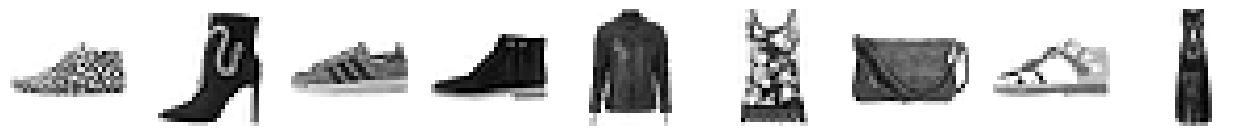

In [4]:
n_show = 9

plt.figure(figsize=(16,4))
for n,i in enumerate(rng.permutation(len(image_train))[:n_show], start=1):
    img = image_train[i]
    
    plt.subplot(1,n_show,n)
    plt.axis(False)
    plt.imshow(img,cmap='gray_r')


In [5]:
n_train,h,w = image_train.shape
n_test,_,_ = image_test.shape

X_train = image_train.reshape(n_train,w*h)
X_test = image_test.reshape(n_test,w*h)

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

## обучение модели

In [6]:
%%time

from sklearn.model_selection import train_test_split

# уменьшаем размер учебного набора для SVM
X_train_, _, target_train_, _ = train_test_split( 
      X_train, target_train, test_size=.73)
display( X_train_.shape)

(16200, 784)

CPU times: user 150 ms, sys: 20.1 ms, total: 170 ms
Wall time: 170 ms


In [7]:
%%time

from sklearn import svm

model = svm.SVC().fit(X_train_,target_train_)

CPU times: user 18.8 s, sys: 82.7 ms, total: 18.9 s
Wall time: 18.9 s


## оценка результатов

In [8]:
%%time 

o_test = model.predict(X_test)

CPU times: user 35.3 s, sys: 6.55 ms, total: 35.3 s
Wall time: 35.3 s


In [9]:
class_names = [ 
    'футболка', 
    'брюки', 
    'свитер', 
    'платье', 
    'пальто', 
    'сандали', 
    'рубашка', 
    'тапки', 
    'сумка', 
    'полусапожки', 
    ]

In [10]:
from sklearn.metrics import classification_report

print( classification_report( 
    target_test, o_test, target_names=class_names) ) 

              precision    recall  f1-score   support

    футболка       0.81      0.83      0.82      1000
       брюки       0.99      0.95      0.97      1000
      свитер       0.77      0.78      0.77      1000
      платье       0.85      0.88      0.86      1000
      пальто       0.76      0.80      0.78      1000
     сандали       0.95      0.93      0.94      1000
     рубашка       0.67      0.60      0.63      1000
       тапки       0.91      0.93      0.92      1000
       сумка       0.95      0.97      0.96      1000
 полусапожки       0.94      0.94      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



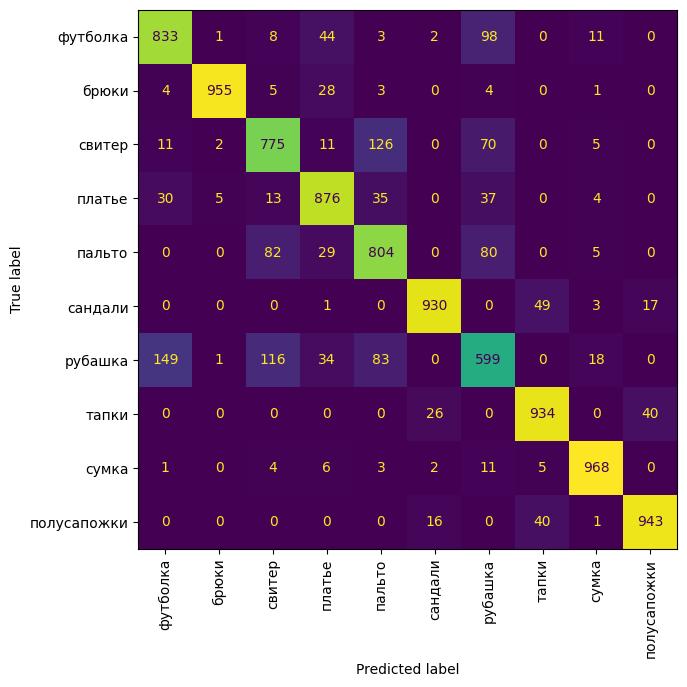

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

fig,ax = plt.subplots(figsize=(7,7))
disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(target_test,o_test), 
    display_labels=class_names,
)
disp.plot(ax=ax, xticks_rotation='vertical', include_values=True, cmap='viridis',  colorbar=False,)
plt.show()

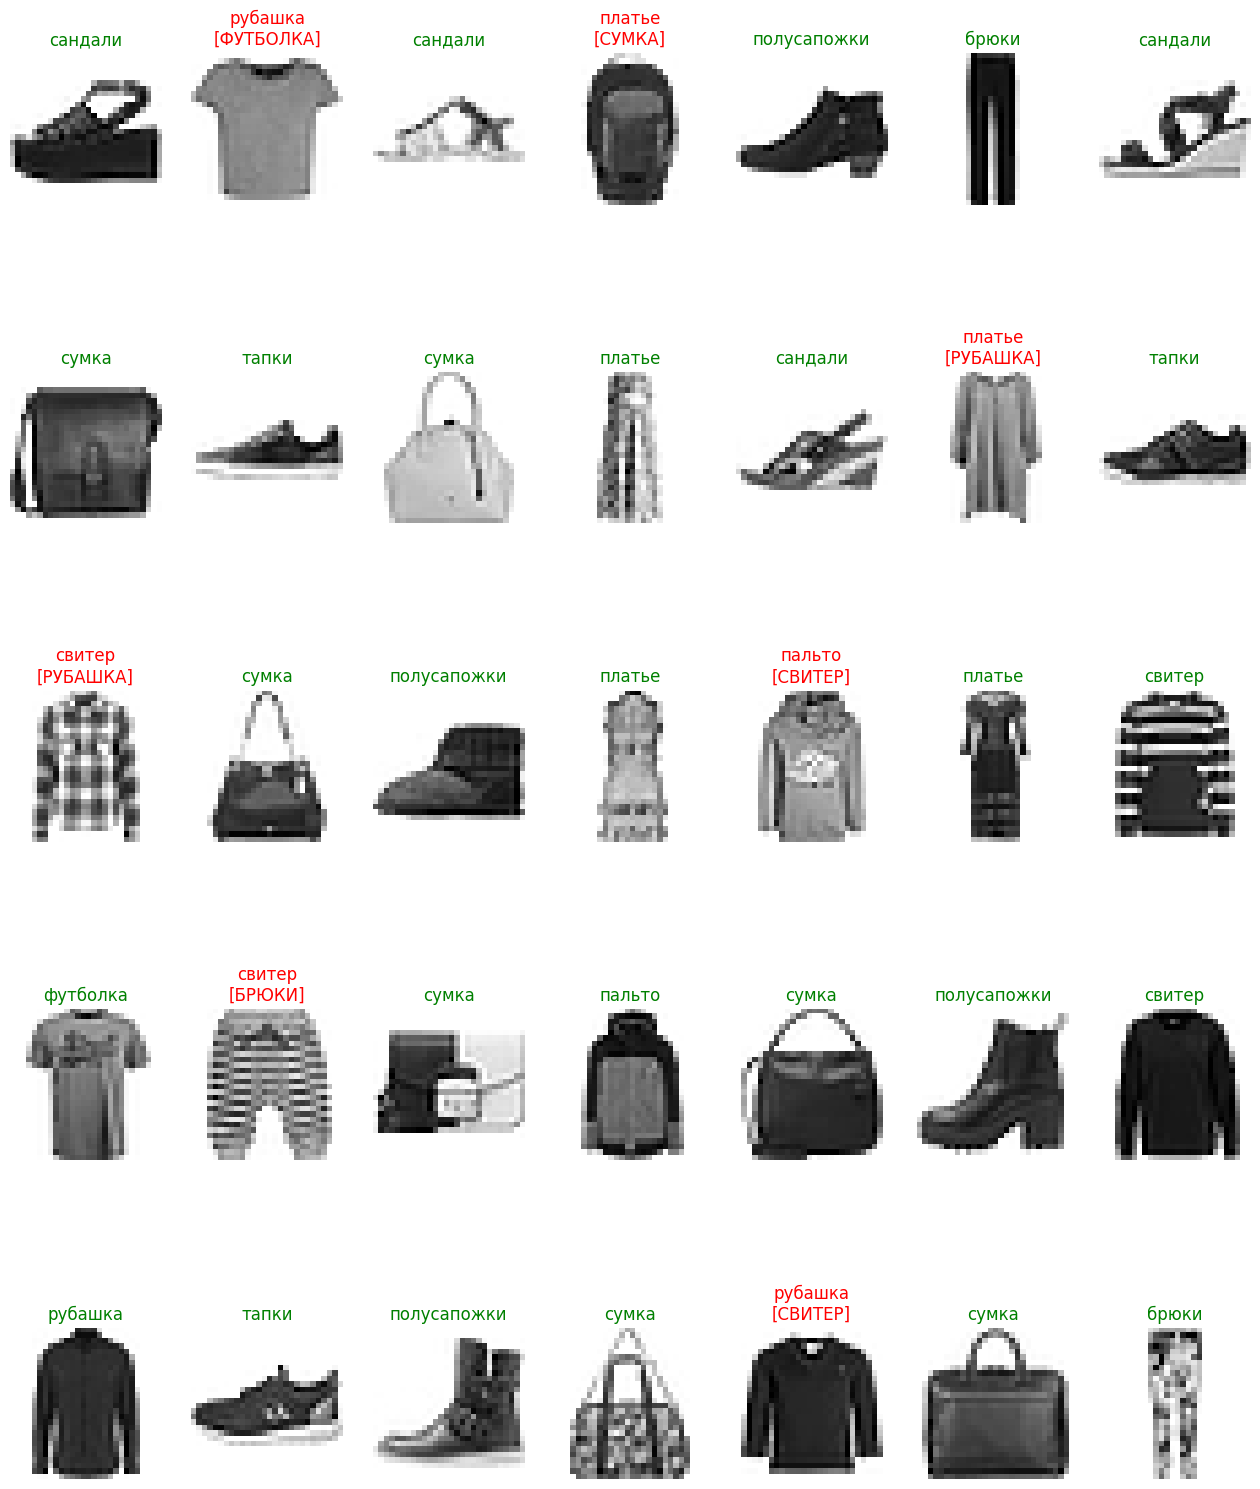

In [12]:
n_show, n_cols = 35, 7

n_rows = np.ceil(n_show/n_cols).astype(int)

plt.figure(figsize=(16,4*n_rows,))
for n,i in enumerate( rng.permutation(len(image_test))[:n_show] ):
    img = image_test[i]
    
    er = target_test[i]==o_test[i]
    t_mark = class_names[target_test[i]] 
    t_pred = class_names[o_test[i]] 
    t,c = (t_mark,'g') if er else (f'{t_pred}\n[{t_mark.upper()}]','r')
   
    plt.subplot(n_rows,n_cols,n+1)
    plt.axis(False)
    plt.title(t,color=c)
    plt.imshow(img,cmap='gray_r')
